In [1]:
using Gmsh: gmsh
using Gridap
using GridapGmsh
using Gridap.TensorValues
using PyPlot
using LinearAlgebra

In [2]:
I2 = SymTensorValue{2,Float64}(1.0 ,0.0 ,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4
I4_dev = I4_sym  - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.5, 0.0, -0.5, 0.0, 0.5, 0.0, -0.5, 0.0, 0.5)

In [3]:
const L = 100
const CH = 25         #Crack height
const CW = 0.01*CH    #Crack Width
const hf = CH/100     #Mesh size parameter
const hfc = hf/4      #Mesh size parameter
const h = 10*hf       #Mesh size parameter
const lsp = hf*2.1

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)

p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h)
p2 = gmsh.model.geo.addPoint(L, 0, 0.0, h)
p3 = gmsh.model.geo.addPoint(L, 0.5*(L-CW), 0.0, h)
p4 = gmsh.model.geo.addPoint(L-CH, 0.5*(L-CW), 0.0, hfc)
p5 = gmsh.model.geo.addPoint(L-CH, 0.5*(L+CW), 0.0, hfc)
p6 = gmsh.model.geo.addPoint(L, 0.5*(L+CW), 0.0, h)
p7 = gmsh.model.geo.addPoint(L, L, 0.0, h)
p8 = gmsh.model.geo.addPoint(0.0, L, 0.0, h)
p9 = gmsh.model.geo.addPoint(0.0, 0.5*(L+CW), 0.0, h)
p10 = gmsh.model.geo.addPoint(CH, 0.5*(L+CW), 0.0, hfc)
p11 = gmsh.model.geo.addPoint(CH, 0.5*(L-CW), 0.0, hfc)
p12 = gmsh.model.geo.addPoint(0.0, 0.5*(L-CW), 0.0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)
l10 = gmsh.model.geo.addLine(p10, p11)
l11 = gmsh.model.geo.addLine(p11, p12)
l12 = gmsh.model.geo.addLine(p12, p1)

cl1 = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12])
ps1 = gmsh.model.geo.addPlaneSurface([cl1])

pg1 = gmsh.model.addPhysicalGroup(2, [ps1])

pg2 = gmsh.model.addPhysicalGroup(1, [l1])
pg3 = gmsh.model.addPhysicalGroup(1, [l7])

gmsh.model.setPhysicalName(2, pg1, "Domain")
gmsh.model.setPhysicalName(1, pg2, "DirichletBottom")
gmsh.model.setPhysicalName(1, pg3, "LoadLine")

gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", h)
gmsh.model.mesh.field.setNumber(11, "XMin", 0.5*(L-3*CH))
gmsh.model.mesh.field.setNumber(11, "XMax", 0.5*(L+3*CH))
gmsh.model.mesh.field.setNumber(11, "YMin", 0.5*(L-2*CH))
gmsh.model.mesh.field.setNumber(11, "YMax", 0.5*(L+2*CH))

gmsh.model.mesh.field.setAsBackgroundMesh(11)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("DoubleEdgeNotch.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00893673s, CPU 0.008667s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 2.83756s, CPU 2.80081s)
Info    : 69936 nodes 139882 elements
Info    : Writing 'DoubleEdgeNotch.msh'...
Info    : Done writing 'DoubleEdgeNotch.msh'


In [4]:
model = GmshDiscreteModel("DoubleEdgeNotch.msh")
writevtk(model,"DoubleEdgeNotch")

Info    : Reading 'DoubleEdgeNotch.msh'...
Info    : 25 entities
Info    : 69936 nodes
Info    : 139518 elements
Info    : Done reading 'DoubleEdgeNotch.msh'


3-element Vector{Vector{String}}:
 ["DoubleEdgeNotch_0.vtu"]
 ["DoubleEdgeNotch_1.vtu"]
 ["DoubleEdgeNotch_2.vtu"]

In [5]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

139438-element Vector{Int8}:
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

In [6]:
const G = 12.5e3
const ν = 0.2
const E = G*(2*(1+ν))
l = 15.0
N = 0.0
Gc = 0.1

const η = 1e-15

1.0e-15

In [7]:
μ = 11263.7362637363
κ = 2472.527472527478
λ = 8333.333333333363
γ = 1.1250000000000035e7

1.1250000000000035e7

In [8]:
function σ_Bmod(ε, ε_in, s_in)
    if tr(ε_in) >= 0
        σM = (s_in^2 + η)*((λ + μ + (κ/2))*tr(ε)*one(ε) + (2*μ + κ)*(I4_dev ⊙ ε))
    else
        σM = (s_in^2 + η)*((2*μ + κ)*(I4_dev ⊙ ε)) + (λ + μ + (κ/2))*tr(ε)*one(ε)
    end
    return σM
end

σ_Bmod (generic function with 1 method)

In [9]:
E_Matrx = TensorValue(0,-1,1,0)

TensorValue{2, 2, Int64, 4}(0, -1, 1, 0)

In [10]:
function ε_Skw(∇,θ)
    ∇ᵀ = transpose(∇)
    w = (0.5*(∇ᵀ - ∇)) - (E_Matrx*θ)
    return w
end

ε_Skw (generic function with 1 method)

In [11]:
function σ_Cmod(ϵ_skew, s_in)
    σM = gd(s_in)*(κ*ϵ_skew)
    return σM
end

σ_Cmod (generic function with 1 method)

In [12]:
function M_mod(∇, s_in)
    M = gd(s_in)*(γ*∇)
    return M
end

M_mod (generic function with 1 method)

In [13]:
function gd(s_in)
    M = s_in^2
    return M
end

gd (generic function with 1 method)

In [14]:
function ψPos(ε_in,∇_uh,θ, ∇_th)
    ∇_uhᵀ = transpose(∇_uh)
    ϵ_skew = 0.5*(∇_uhᵀ - ∇_uh) - E_Matrx*θ
    if tr(ε_in) >= 0
        ψPos = 0.5*((λ + μ + (κ/2))*(tr(ε_in))^2 + (2*μ+κ)*((I4_dev ⊙ ε_in) ⊙ (I4_dev ⊙ ε_in))) + 0.5*(κ*(ϵ_skew ⊙ ϵ_skew)) + 0.5*γ*(∇_th ⋅ ∇_th)
    else
        ψPos = 0.5*((2*μ+κ)*((I4_dev ⊙ ε_in) ⊙ (I4_dev ⊙ ε_in))) + 0.5*(κ*(ϵ_skew ⊙ ϵ_skew)) + 0.5*γ*(∇_th ⋅ ∇_th)
    end
    return ψPos 
end

ψPos (generic function with 1 method)

In [15]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
    ψPlus_in = ψhPos_in
        if ψPlus_in >= ψPlusPrev_in
            ψPlus_out = ψPlus_in
        else
            ψPlus_out = ψPlusPrev_in
        end
    true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [16]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = solve(op)
  qh
end

project (generic function with 1 method)

In [17]:
order = 1
degree = 2*order

2

In [18]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [19]:
sId = CellState(1.0,dΩ)
shId = project(sId,model,dΩ,order)

SingleFieldFEFunction():
 num_cells: 139438
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 5265783635338187884

In [20]:
LoadTagId = get_tag_from_name(labels,"LoadLine")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 40
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 9844330832068286164

In [21]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;conformity=:H1)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 139438
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 5265783635338187884

In [22]:
reffe_theta = ReferenceFE(lagrangian,Float64,order)
V0_theta  = TestFESpace(model,reffe_theta;
  conformity=:H1)
θh = zero(V0_theta)

SingleFieldFEFunction():
 num_cells: 139438
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 5265783635338187884

In [23]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["DirichletBottom","LoadLine"],
          dirichlet_masks=[(true,true), (true,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 139438
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 5265783635338187884

In [24]:
V0 = MultiFieldFESpace([V0_Disp,V0_theta])

MultiFieldFESpace()

In [25]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
    U_PF = TrialFESpace(V0_PF)
        a_PF(s,ϕ) = ∫( (Gc*lsp*(∇(ϕ)⋅ ∇(s))) + (2*s*ψPlusPrev_in*ϕ)  + ((Gc/lsp)*s*ϕ) )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF)
    return sh_out
end

stepPhaseField (generic function with 1 method)

In [26]:
function Skw(u,θ)
    ∇ᵀ = transpose(∇(u))
    w = (0.5*(∇ᵀ - ∇(u)) - (E_Matrx*θ))
    return w
end

Skw (generic function with 1 method)

In [27]:
function stepDisp(uh_in,θ_in,sh_in,uApp)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(uApp,uApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2])
        
        U_theta = TrialFESpace(V0_theta)
        U = MultiFieldFESpace([U_Disp,U_theta ])

        a((u,θ),(w,v))  = ∫( (ε(w) ⊙ (σ_Bmod∘(ε(u),ε(uh_in),sh_in)) ) + ((Skw(w,v)) ⊙ (σ_Cmod∘(ε_Skw∘(∇(u),θ), sh_in)) ) + ((∇(v))⋅ (M_mod∘(∇(θ),sh_in))) - (v*((E_Matrx) ⊙ (σ_Cmod∘(ε_Skw∘(∇(u),θ),sh_in))) ))*dΩ
        b((w,v))= 0
        op_Disp = AffineFEOperator(a,b,U,V0)
        uh_out = solve(op_Disp)
        uh_out,phih_out = uh_out
    return uh_out, phih_out
end

stepDisp (generic function with 1 method)

In [28]:
cd("DoubleNotch_N0.3_l30.0")

In [29]:
uApp = 0
delu = 0.05/40
uAppMax = 0.05
innerMax = 10
count = 0
Load = Float64[]
LoadX = Float64[]
Displacement = Float64[]

sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ψPlusPrev = CellState(0.0,dΩ)
ψhPos = CellState(0.0,dΩ)
ψhPos_in = project(ψhPos,model,dΩ,order)

while uApp .< uAppMax 
        
    uApp = uApp .+ delu
    count = count .+ 1
    
    print("\n Entering displacemtent step$count :", float(uApp))
    
    for inner = 1:innerMax
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        err = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(err))
        
        sh = stepPhaseField(uh,ψhPlusPrev)
        uh,θh = stepDisp(uh,θh,sh,uApp)
        
        ψhPos_in = ψPos∘(ε(uh),∇(uh),θh,∇(θh))      
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
        
        if err < 1e-8
            break 
        end
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_Bmod∘(ε(uh),ε(uh),sh)) ) *dΓ_Load + ∫( n_Γ_Load ⋅ (σ_Cmod∘(ε_Skw∘(∇(uh),θh),sh) ) )  *dΓ_Load)
    Load_Act = sqrt(Node_Force[1]^2 + Node_Force[2]^2)
    uApp_Act = sqrt(uApp^2 + uApp^2)
    
    push!(Load, Load_Act)
    push!(LoadX, Node_Force[1])
    push!(Displacement, uApp_Act)
    if mod(count,10) == 0
         writevtk(Ω,"results_DoubleNotch_N0.3_l30.0_$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"θ" => θh, "epsi"=>ε(uh),"Sig"=>(σ_Bmod∘(ε(uh),ε(uh),sh))])
    end
end


 Entering displacemtent step1 :0.00125
 Relative error = 3.202033167584182e-17
 Entering displacemtent step2 :0.0025
 Relative error = 2.5220697064533037e-5
 Relative error = 7.565674585183583e-5
 Relative error = 1.3920292576275708e-8
 Relative error = 4.6148287003300583e-11
 Entering displacemtent step3 :0.00375
 Relative error = 2.08306081709388e-13
 Entering displacemtent step4 :0.005
 Relative error = 0.0001260538884318789
 Relative error = 0.00017643273475027345
 Relative error = 1.307282672421559e-7
 Relative error = 1.7468173750901734e-9
 Entering displacemtent step5 :0.00625
 Relative error = 3.178543408301114e-11
 Entering displacemtent step6 :0.007500000000000001
 Relative error = 0.00022659671008799155
 Relative error = 0.0002769371762086253
 Relative error = 4.6947363501908856e-7
 Relative error = 1.4332790041433718e-8
 Relative error = 5.95086299318021e-10
 Entering displacemtent step7 :0.00875
 Relative error = 2.6505756182489333e-11
 Entering displacemtent step8 :0.01


┌ Warning: detected extension '.0_10' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step11 :0.013749999999999998
 Relative error = 4.452779989414123e-10
 Entering displacemtent step12 :0.014999999999999998
 Relative error = 0.000523173587136239
 Relative error = 0.0005750195912758697
 Relative error = 4.373324490499649e-6
 Relative error = 5.873946829857933e-7
 Relative error = 1.0629909914083422e-7
 Relative error = 2.0594967532626407e-8
 Relative error = 4.0644990838755105e-9
 Entering displacemtent step13 :0.016249999999999997
 Relative error = 8.065816791385012e-10
 Entering displacemtent step14 :0.017499999999999998
 Relative error = 0.0006187897000788971
 Relative error = 0.0006725703104359621
 Relative error = 7.418542989124296e-6
 Relative error = 1.4274343767579681e-6
 Relative error = 3.687322832539037e-7
 Relative error = 1.0203485380899326e-7
 Relative error = 2.8777204603743114e-8
 Relative error = 8.163030873536322e-9
 Entering displacemtent step15 :0.01875
 Relative error = 2.31982759909498e-9
 Entering displacemtent step16 :0.0

┌ Warning: detected extension '.0_20' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step21 :0.026250000000000006
 Relative error = 2.060767729457929e-6
 Relative error = 0.0009363273528239253
 Relative error = 2.801734229422792e-5
 Relative error = 1.7479752380277302e-5
 Relative error = 1.5064231931264523e-5
 Relative error = 1.4148612449943742e-5
 Relative error = 1.3833808605598941e-5
 Relative error = 1.3892017020138474e-5
 Relative error = 1.4244425479430108e-5
 Relative error = 1.4866799522992882e-5
 Entering displacemtent step22 :0.027500000000000007
 Relative error = 1.5741987697000905e-5
 Relative error = 0.0009101841440768947
 Relative error = 5.118686171876612e-5
 Relative error = 4.3096904224559976e-5
 Relative error = 4.2817159336010234e-5
 Relative error = 4.281818491956107e-5
 Relative error = 4.231125331949309e-5
 Relative error = 4.098171349911806e-5
 Relative error = 3.918328835805022e-5
 Relative error = 3.733347502745763e-5
 Entering displacemtent step23 :0.028750000000000008
 Relative error = 3.553801694576476e-5
 Relative

┌ Warning: detected extension '.0_30' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step31 :0.038750000000000014
 Relative error = 0.00023103506577713885
 Relative error = 0.0003808858181426025
 Relative error = 0.00025628310971754825
 Relative error = 0.00022304544382969668
 Relative error = 0.0002009732825995724
 Relative error = 0.00018268566924471477
 Relative error = 0.00016703168457999086
 Relative error = 0.00015331260207209033
 Relative error = 0.00014124054241828696
 Relative error = 0.00013087105896886
 Entering displacemtent step32 :0.040000000000000015
 Relative error = 0.00012154046538085937
 Relative error = 0.0002065477167901474
 Relative error = 0.0001385578022655353
 Relative error = 0.00012134301529684373
 Relative error = 0.0001101236395244069
 Relative error = 0.00010095019155446881
 Relative error = 9.335301286514832e-5
 Relative error = 8.632520646443219e-5
 Relative error = 8.009673943507353e-5
 Relative error = 7.488752241642966e-5
 Entering displacemtent step33 :0.041250000000000016
 Relative error = 6.988825723507281e

┌ Warning: detected extension '.0_40' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112


In [30]:
writevtk(Ω,"results_DoubleNotch_N0.3_l30.0_$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"θ" => θh, "epsi"=>ε(uh)])

┌ Warning: detected extension '.0_40' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112


(["results_DoubleNotch_N0.3_l30.0_40.vtu"],)

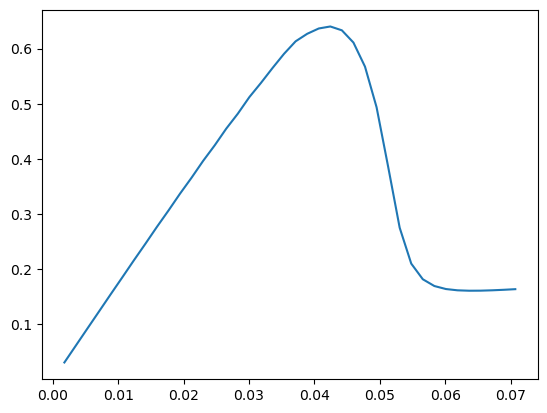

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cf0ceb2b0>

In [31]:
plot(Displacement,Load*1e-3)

In [32]:
cd("../DispLoadData_DoubleNotch_Vol-Dev")

In [33]:
using DelimitedFiles
Disp = writedlm( "DispDataDoubleNotchSpectral_N0.3_l30.0.csv",  Displacement, ',')
Force = writedlm("LoadDataDoubleNotchSpectral_N0.3_l30.0.csv",  Load, ',')